<a href="https://colab.research.google.com/github/sayed6201/nlp_20newsgroups_exercise/blob/main/exercise_text_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Imports**

In [1]:
import sklearn as sklearn
from sklearn.datasets import fetch_20newsgroups
from pprint import pprint
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# **Data Importing**

In [2]:
newsgroups_train = fetch_20newsgroups(subset='train')
newsgroups_test = fetch_20newsgroups(subset='test')

In [4]:
pprint(list(newsgroups_train.target_names))
pprint(dir(newsgroups_train))
pprint(newsgroups_train.target)

pprint(len(newsgroups_train.data))
pprint(len(newsgroups_test.data))

x_train, y_train = newsgroups_train.data, newsgroups_train.target
x_test, y_test = newsgroups_test.data, newsgroups_test.target

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']
['DESCR', 'data', 'filenames', 'target', 'target_names']
array([7, 4, 4, ..., 3, 1, 8])
11314
7532


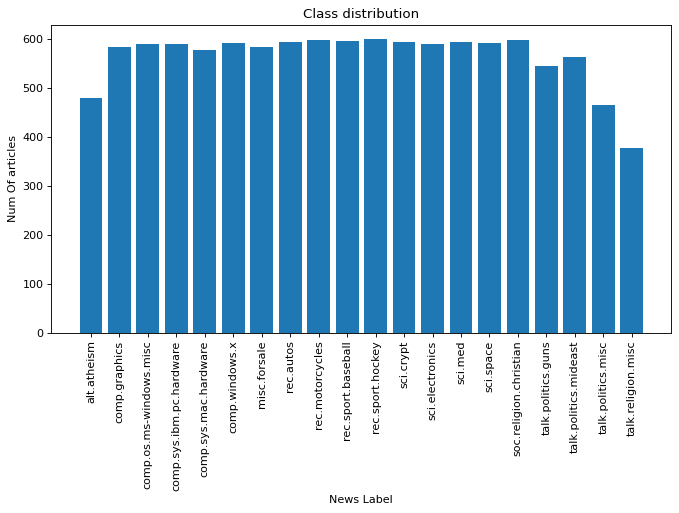

In [5]:
targets, frequency = np.unique(y_train, return_counts=True)

plt.figure(figsize=(10, 5), dpi= 80, facecolor='w', edgecolor='k')
plt.bar(newsgroups_train.target_names,frequency)
plt.xticks(rotation=90)
plt.title('Class distribution')
plt.xlabel('News Label')
plt.ylabel('Num Of articles')
plt.show()

# **Vectorizing text using CountVectorizer and training some classifiers**

In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

countVec =  CountVectorizer()
x_train_countV = countVec.fit_transform(x_train)
x_test_countV = countVec.transform(x_test)

                          precision    recall  f1-score   support

             alt.atheism       0.79      0.77      0.78       319
           comp.graphics       0.67      0.74      0.70       389
 comp.os.ms-windows.misc       0.20      0.00      0.01       394
comp.sys.ibm.pc.hardware       0.56      0.77      0.65       392
   comp.sys.mac.hardware       0.84      0.75      0.79       385
          comp.windows.x       0.65      0.84      0.73       395
            misc.forsale       0.93      0.65      0.77       390
               rec.autos       0.87      0.91      0.89       396
         rec.motorcycles       0.96      0.92      0.94       398
      rec.sport.baseball       0.96      0.87      0.91       397
        rec.sport.hockey       0.93      0.96      0.95       399
               sci.crypt       0.67      0.95      0.78       396
         sci.electronics       0.79      0.66      0.72       393
                 sci.med       0.87      0.82      0.85       396
         

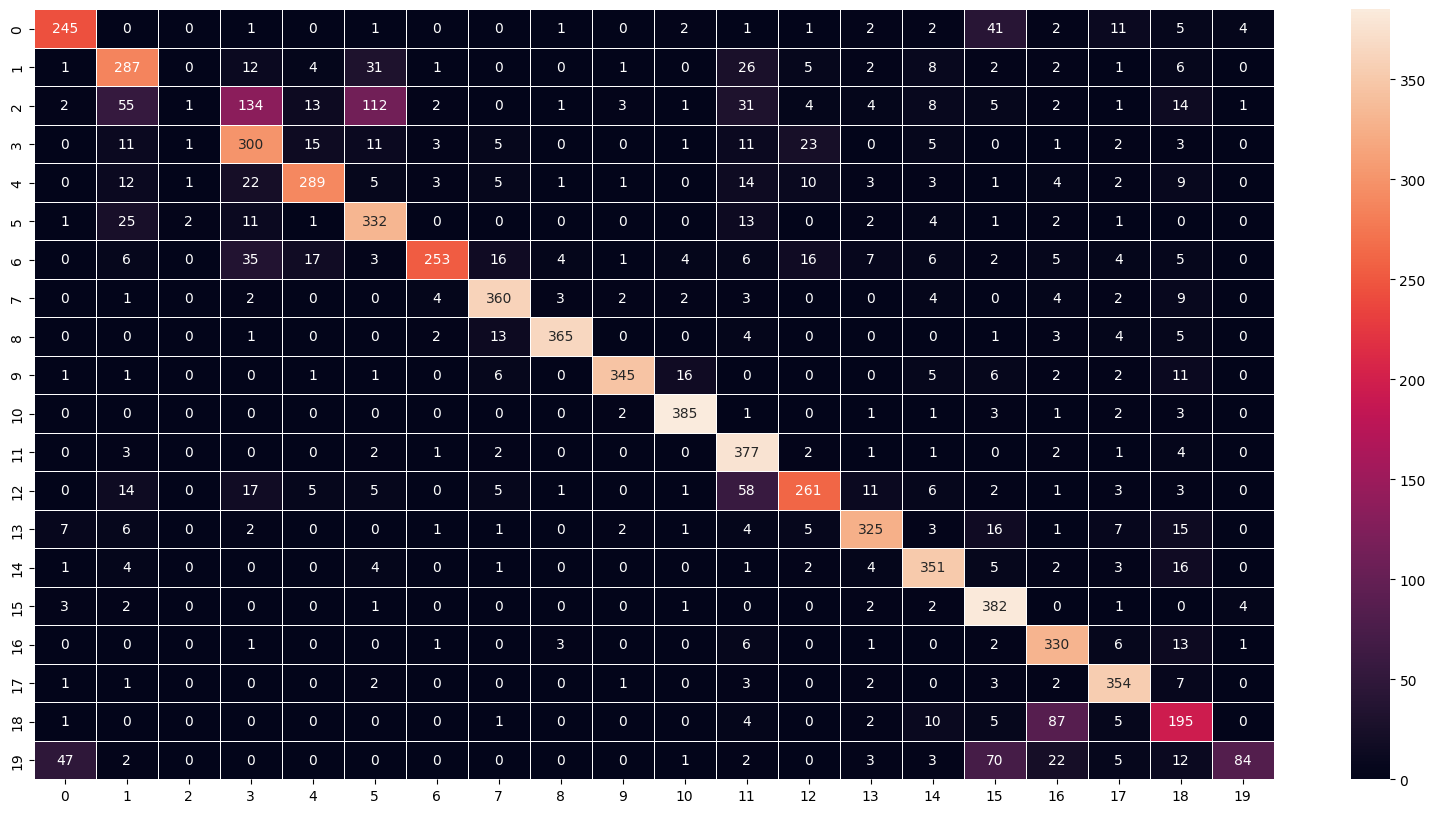

In [7]:

from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, classification_report
import json

ml_MNB_model =  MultinomialNB()
ml_MNB_model.fit(x_train_countV, y_train)
predicted_y_mnb = ml_MNB_model.predict(x_test_countV)


plt.figure(figsize=(20, 10))
sns.heatmap(confusion_matrix(y_test, predicted_y_mnb), annot=True, fmt="d",  linewidths=0.6)

print(classification_report(y_test,predicted_y_mnb, target_names=newsgroups_train.target_names))



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


                          precision    recall  f1-score   support

             alt.atheism       0.72      0.71      0.71       319
           comp.graphics       0.69      0.75      0.72       389
 comp.os.ms-windows.misc       0.70      0.68      0.69       394
comp.sys.ibm.pc.hardware       0.67      0.68      0.68       392
   comp.sys.mac.hardware       0.74      0.81      0.77       385
          comp.windows.x       0.80      0.70      0.75       395
            misc.forsale       0.82      0.88      0.85       390
               rec.autos       0.83      0.84      0.84       396
         rec.motorcycles       0.91      0.92      0.91       398
      rec.sport.baseball       0.84      0.88      0.86       397
        rec.sport.hockey       0.91      0.92      0.92       399
               sci.crypt       0.90      0.87      0.89       396
         sci.electronics       0.68      0.72      0.70       393
                 sci.med       0.83      0.73      0.77       396
         

<Axes: >

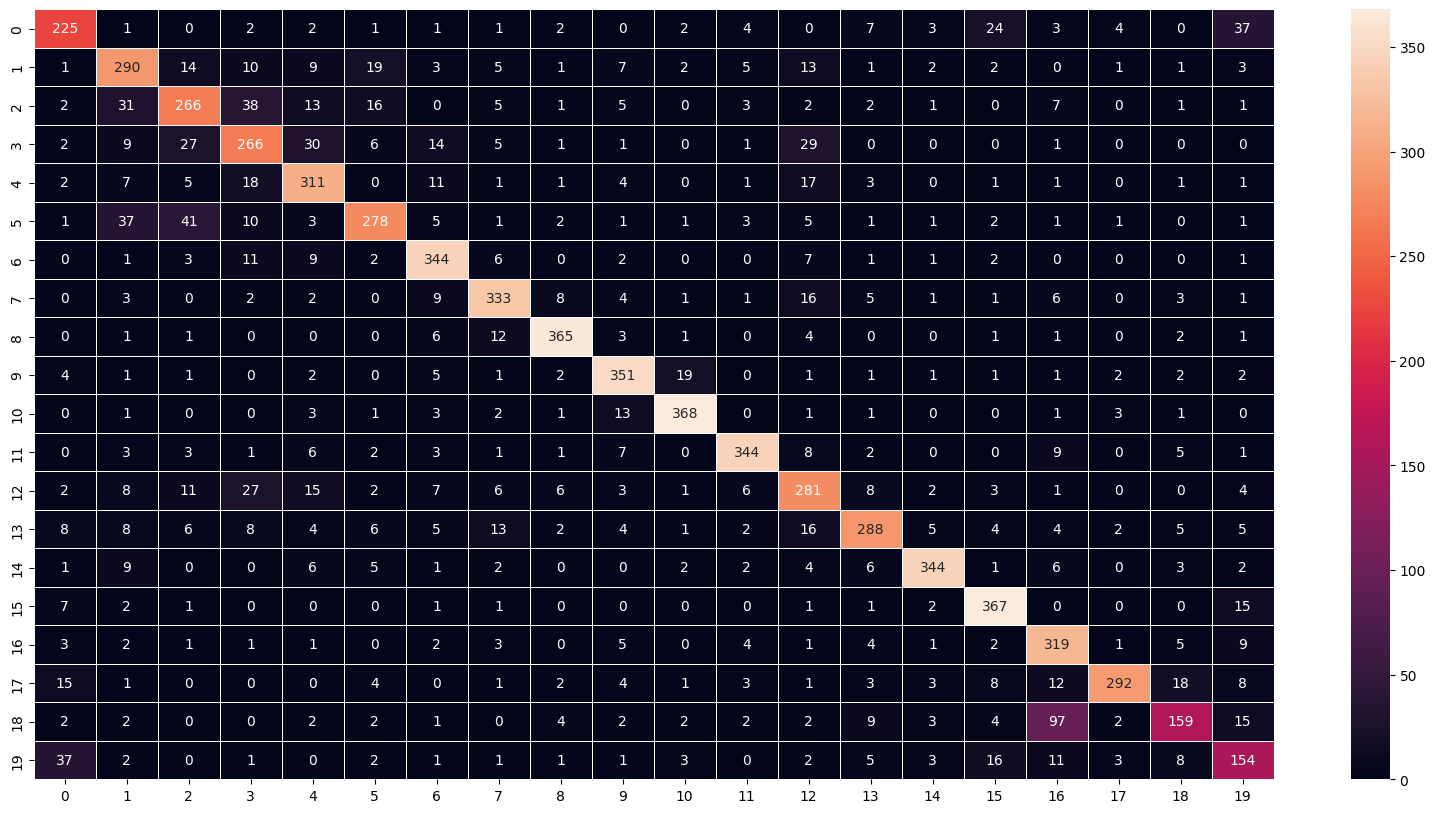

In [8]:
from sklearn.linear_model import LogisticRegression
ml_model_LR =  LogisticRegression(multi_class='multinomial', solver='lbfgs')
ml_model_LR.fit(x_train_countV, y_train)
predicted_y_lr = ml_model_LR.predict(x_test_countV)
print(classification_report(y_test,predicted_y_lr, target_names=newsgroups_train.target_names))

plt.figure(figsize=(20, 10))
sns.heatmap(confusion_matrix(y_test, predicted_y_lr), annot=True, fmt="d", linewidths=0.6)


# **Improvement - Data cleaning, Vectorizing with TFIDF, Hyperpatameter tuning**


In [37]:
import pandas as pd
df_train =  pd.DataFrame({'data': x_train, 'target': y_train})
df_test =  pd.DataFrame({'data': x_test, 'target': y_test})

df_train.head()


,data,target
0,From: lerxst@wam.umd.edu (where's my thing)\nS...,7
1,From: guykuo@carson.u.washington.edu (Guy Kuo)...,4
2,From: twillis@ec.ecn.purdue.edu (Thomas E Will...,4
3,From: jgreen@amber (Joe Green)\nSubject: Re: W...,1
4,From: jcm@head-cfa.harvard.edu (Jonathan McDow...,14


In [18]:
df_test.head()

,data,target
0,From: v064mb9k@ubvmsd.cc.buffalo.edu (NEIL B. ...,7
1,From: Rick Miller <rick@ee.uwm.edu>\nSubject: ...,5
2,From: mathew <mathew@mantis.co.uk>\nSubject: R...,0
3,From: bakken@cs.arizona.edu (Dave Bakken)\nSub...,17
4,From: livesey@solntze.wpd.sgi.com (Jon Livesey...,19


In [11]:
df_train['data'][0]

"From: lerxst@wam.umd.edu (where's my thing)\nSubject: WHAT car is this!?\nNntp-Posting-Host: rac3.wam.umd.edu\nOrganization: University of Maryland, College Park\nLines: 15\n\n I was wondering if anyone out there could enlighten me on this car I saw\nthe other day. It was a 2-door sports car, looked to be from the late 60s/\nearly 70s. It was called a Bricklin. The doors were really small. In addition,\nthe front bumper was separate from the rest of the body. This is \nall I know. If anyone can tellme a model name, engine specs, years\nof production, where this car is made, history, or whatever info you\nhave on this funky looking car, please e-mail.\n\nThanks,\n- IL\n   ---- brought to you by your neighborhood Lerxst ----\n\n\n\n\n"

In [38]:
import re
import string

def text_cleaner(text):
  text = re.sub(r"""\w*\d\w*""", ' ', text)
  text = re.sub('[%s]' % re.escape(string.punctuation), ' ',text)
  text = re.sub(r"\r?\n|\r"," ", text)
  text = text.lower()
  return text


df_train['data'] = df_train['data'].apply(text_cleaner)
df_test['data'] = df_test['data'].apply(text_cleaner)


df_train['data'][0]

'from  lerxst wam umd edu  where s my thing  subject  what car is this   nntp posting host    wam umd edu organization  university of maryland  college park lines      i was wondering if anyone out there could enlighten me on this car i saw the other day  it was a   door sports car  looked to be from the late    early    it was called a bricklin  the doors were really small  in addition  the front bumper was separate from the rest of the body  this is  all i know  if anyone can tellme a model name  engine specs  years of production  where this car is made  history  or whatever info you have on this funky looking car  please e mail   thanks    il         brought to you by your neighborhood lerxst          '

In [39]:
df_test['data'][0]

'from    ubvmsd cc buffalo edu  neil b  gandler  subject  need info on     bonneville organization  university at buffalo lines    news software  vax vms vnews     nntp posting host  ubvmsd cc buffalo edu    i am a little confused on all of the models of the     bonnevilles  i have heard of the le se lse sse ssei  could someone tell me the differences are far as features or performance  i am also curious to know what the book value is for prefereably the   model  and how much less than book value can you usually get them for  in other words how much are they in demand this time of year  i have heard that the mid spring early summer is the best time to buy   \t\t\tneil gandler '

In [40]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = list(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [66]:
nltk.download('punkt')

def toknize_my_text(x):
    return ( w for w in nltk.word_tokenize(x) if len(w) >3)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [67]:
dd = toknize_my_text('from    ubvmsd cc buffalo edu  neil b  gandler  subject  need info on     bonneville organization  university at buffalo lines    news software  vax vms vnews     nntp posting host  ubvmsd cc buffalo edu    i am a little confused on all of the models of the     bonnevilles  i have heard of the le se lse sse ssei  could someone tell me the differences are far as features or performance  i am also curious to know what the book value is for prefereably the   model  and how much less than book value can you usually get them for  in other words how much are they in demand this time of year  i have heard that the mid spring early summer is the best time to buy   			neil gandler')
print(list(dd))

['from', 'ubvmsd', 'buffalo', 'neil', 'gandler', 'subject', 'need', 'info', 'bonneville', 'organization', 'university', 'buffalo', 'lines', 'news', 'software', 'vnews', 'nntp', 'posting', 'host', 'ubvmsd', 'buffalo', 'little', 'confused', 'models', 'bonnevilles', 'have', 'heard', 'ssei', 'could', 'someone', 'tell', 'differences', 'features', 'performance', 'also', 'curious', 'know', 'what', 'book', 'value', 'prefereably', 'model', 'much', 'less', 'than', 'book', 'value', 'usually', 'them', 'other', 'words', 'much', 'they', 'demand', 'this', 'time', 'year', 'have', 'heard', 'that', 'spring', 'early', 'summer', 'best', 'time', 'neil', 'gandler']


In [68]:
tfIdfVec4 =  TfidfVectorizer(
  tokenizer=toknize_my_text,
  stop_words='english'
)

x_train_tfids4 = tfIdfVec4.fit_transform(df_train['data'])
x_test_tfids4 = tfIdfVec4.transform(df_test['data'])

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


                          precision    recall  f1-score   support

             alt.atheism       0.78      0.72      0.75       319
           comp.graphics       0.69      0.78      0.73       389
 comp.os.ms-windows.misc       0.73      0.75      0.74       394
comp.sys.ibm.pc.hardware       0.68      0.70      0.69       392
   comp.sys.mac.hardware       0.79      0.76      0.78       385
          comp.windows.x       0.84      0.76      0.80       395
            misc.forsale       0.80      0.89      0.84       390
               rec.autos       0.87      0.87      0.87       396
         rec.motorcycles       0.95      0.91      0.93       398
      rec.sport.baseball       0.91      0.93      0.92       397
        rec.sport.hockey       0.93      0.94      0.94       399
               sci.crypt       0.94      0.90      0.92       396
         sci.electronics       0.73      0.80      0.76       393
                 sci.med       0.89      0.87      0.88       396
         

<Axes: >

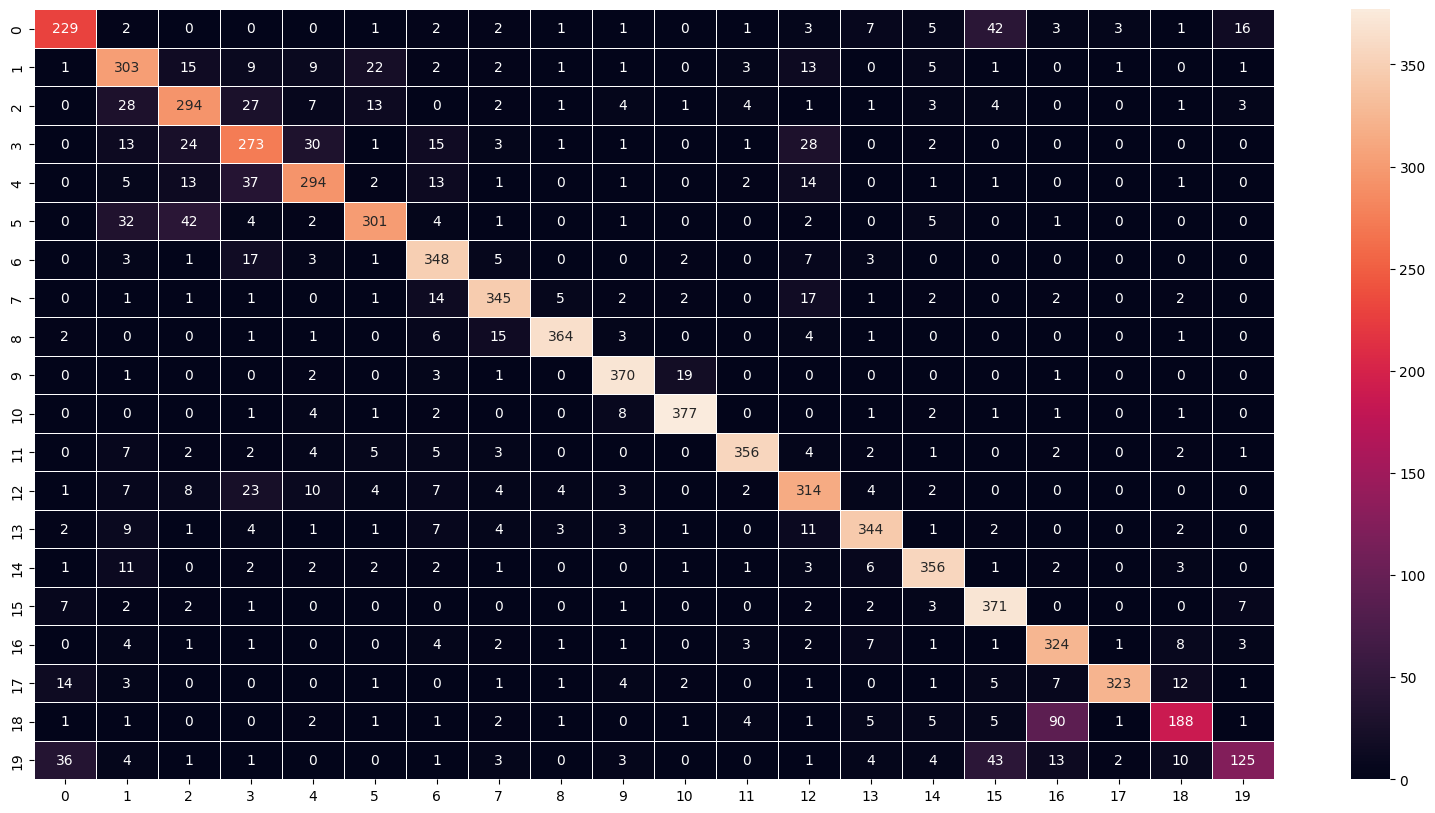

In [69]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

ml_model_LR4 =  LogisticRegression(multi_class='multinomial', solver='lbfgs')
ml_model_LR4.fit(x_train_tfids4, y_train)
predicted_y_lr4 = ml_model_LR4.predict(x_test_tfids4)
print(classification_report(y_test,predicted_y_lr4, target_names=newsgroups_train.target_names))

plt.figure(figsize=(20, 10))
sns.heatmap(confusion_matrix(y_test, predicted_y_lr4), annot=True, fmt="d", linewidths=0.6)